# Theory

---

## Logistic Regression

- for classification
- z = wx + b | $\frac{1 }{1 + e^{-z}}$
- sigmoid function to get it to a binary range

## Polynomial Regression

- a single feature being divided into several dimensions
- so a quad or cubic or further kinda equation instead of linear


In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
data = pd.read_csv("DataSets/Social_Network_Ads.csv")

# Display the first few rows of the dataset
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [35]:
# Preprocessing
# Encode categorical variable 'Gender'
labelencoder = LabelEncoder()
data["Gender"] = labelencoder.fit_transform(data["Gender"])  # Male=1, Female=0
# Define features and target variable
X = data[["Gender", "Age", "EstimatedSalary"]].values  # Select relevant columns
y = data["Purchased"].values  # Target variable


In [36]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


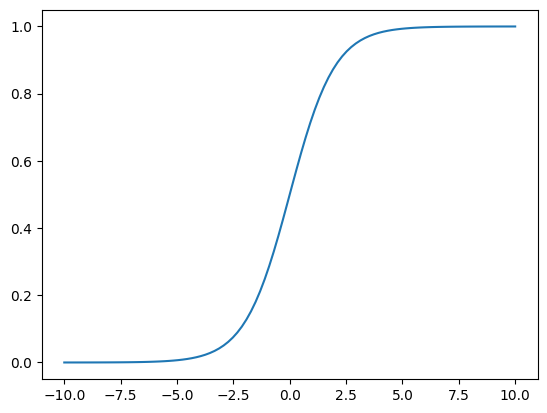

In [37]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.show()

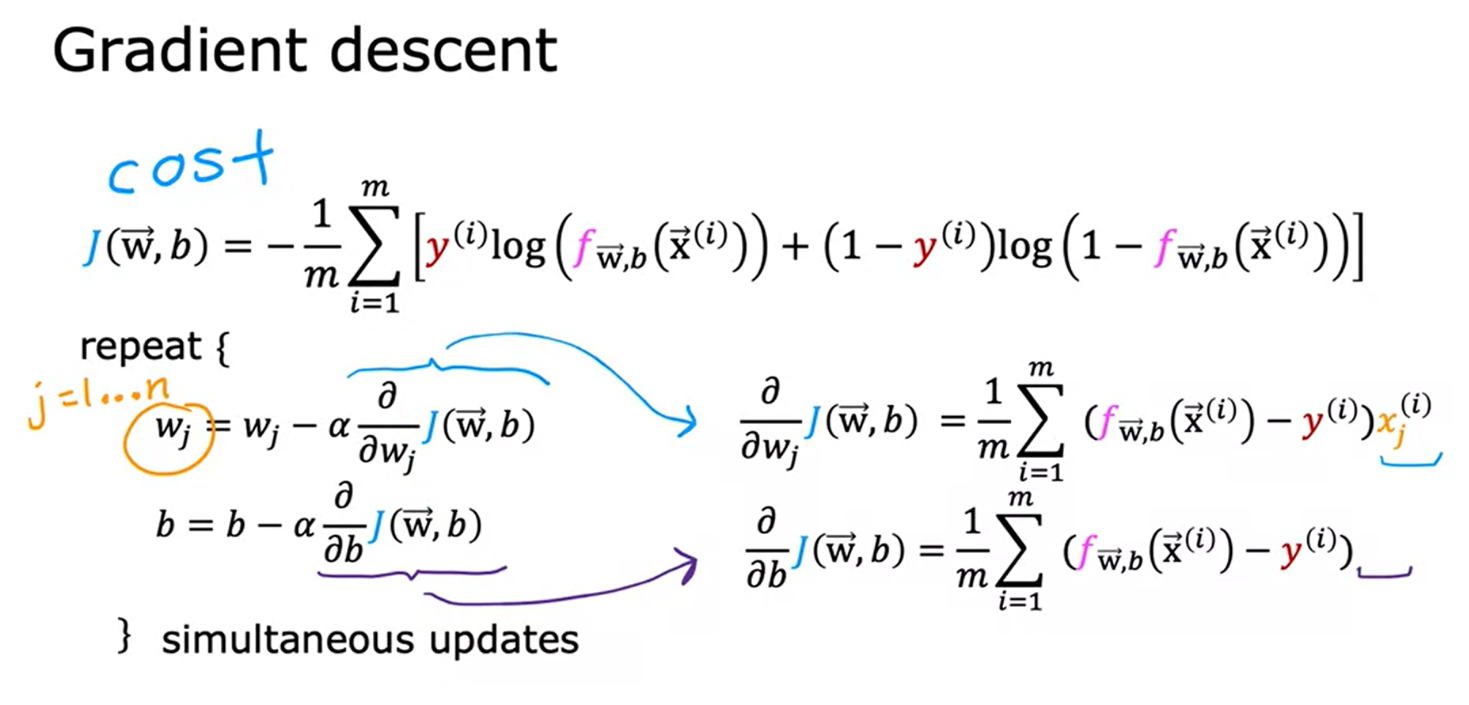


# logistic regression from scratch


In [38]:
# Logistic Regression Implementation
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.lr = learning_rate
        self.iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for i in range(self.iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            # Update weights and bias by calculating Gradient
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return [1 if i > 0.5 else 0 for i in self.sigmoid(linear_model)]

In [39]:
# Train the model
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8625

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80


Confusion Matrix:
[[50  2]
 [ 9 19]]


# logistic regression with sklearn


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
data = pd.read_csv("DataSets\Social_Network_Ads.csv")
# Encode Gender (Male/Female → 1/0)
le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])


<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
C:\Users\junai\AppData\Local\Temp\ipykernel_21556\3481205762.py:8: SyntaxWarning: invalid escape sequence '\S'
  data = pd.read_csv("DataSets\Social_Network_Ads.csv")


In [41]:
# Features & target
X = data[["Gender", "Age", "EstimatedSalary"]].values
y = data["Purchased"].values
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [42]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
# Predictions
y_pred = model.predict(X_test)
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8875
Confusion Matrix:
 [[50  2]
 [ 7 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



# polynomial regression


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load dataset
data = pd.read_csv("DataSets/Position_Salaries.csv")

# Independent variable (Level) and dependent variable (Salary)
X = data[["Level"]].values
y = data["Salary"].values


In [44]:
# Polynomial transformation (degree=4 for better curve fitting)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Train polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predictions
y_pred = poly_model.predict(X_poly)


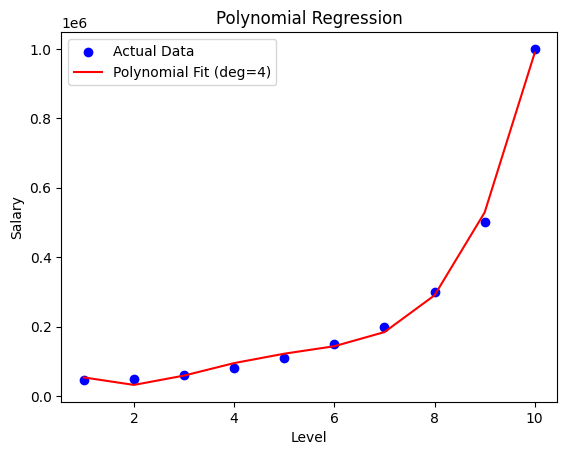

In [45]:
# Plot results
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, y_pred, color="red", label="Polynomial Fit (deg=4)")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.title("Polynomial Regression")
plt.legend()
plt.show()
